## House Prices Kernal
from the following Kaggle competition<br>
1. https://www.kaggle.com/c/house-prices-advanced-regression-techniques<br>
Excellent tutorial where much of the data engineering came from<br>
2. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard<br>
Excellent data cleaning tutorial for this dataset (techniques used herein)<br>
3. https://www.kaggle.com/virtonos/housing-prices-forecasts<br>
and this one for treating categorical data<br>
4. http://pbpython.com/categorical-encoding.html

Feature engineering as per 2 and 3 kicked me up 1000 places, then I used 2's lightgbm 
model hyperparameters which kicked me up another 1000. I suppose I could have built 
my own or gridsearched or randomsearched my way to decent parameters.  But I'm lazy.

In [76]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

## Create paths

In [78]:
import os
def mkdir(pth):
    if (not os.path.exists(pth)):
        os.mkdir(pth)
    
PATH = "data/KPData/HousePrices"
PATH_TRN = os.path.join(PATH,"trn")
PATH_VAL = os.path.join(PATH,"val")
PATH_TST = os.path.join(PATH,"tst")
mkdir(PATH)
mkdir(PATH_TRN)
mkdir(PATH_VAL)
mkdir(PATH_TST)      

# Get data
This data comes from the following Kaggle competition
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

cannot do automatically through python unless you send login credentials to Kaggle (Kaggle api?)
so get csv files using chrome
use

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/test.csv

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv



# View the data

In [79]:
df_train = pd.read_csv(f'{PATH_TRN}/train.csv', low_memory=False)
df_test = pd.read_csv(f'{PATH_TST}/test.csv', low_memory=False)

numb_rows = df_train.shape[0]

In [80]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [81]:
display_all(df_train.tail().transpose())

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


## Get rid of some outliers

In [82]:
# Price vs Living area - the bigger the house usually the more money its worth
#scatter plot grlivarea/saleprice
def showdata(ds):
    var = 'GrLivArea'
    data = pd.concat([ds['SalePrice'], ds[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', marker = "s", title = "Looking for outliers");

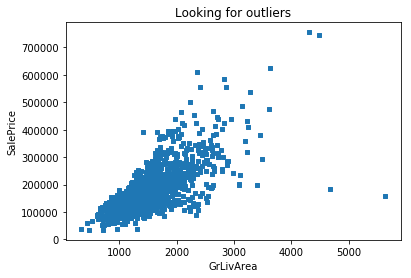

In [83]:
#look for outliers
showdata(df_train)

In [84]:
#get rid of the 2 outliers
df_train = df_train[df_train['GrLivArea'] < 4500]

## Lets see what salesprice looks like

In [85]:
#get some stats on the response variable
df_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180932.92 and sigma = 79467.79



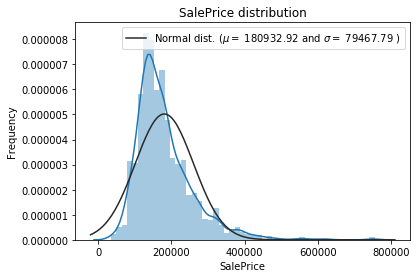

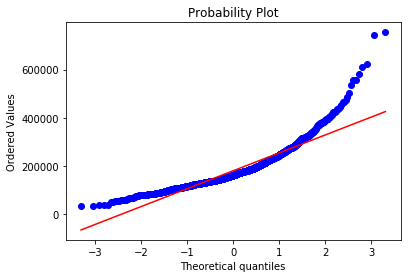

In [86]:
from scipy.stats import norm, skew #for some statistics
from scipy import stats

sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Log transformation of the dependant variable (SalesPrice)


 mu = 12.02 and sigma = 0.40



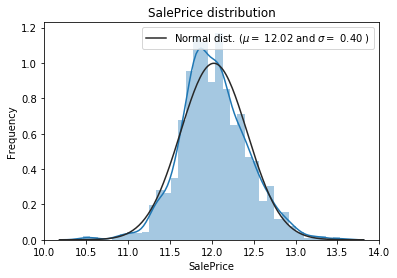

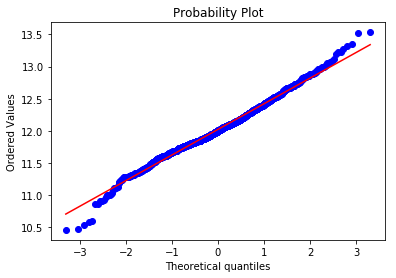

In [87]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Skew is corrected and the data appears normally distributed

## Concatenate the train and test sets to do feature engineering

In [88]:
#remember their size so we can split them later
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

#need this for training
y  = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

#ID is a conundrum, it aint useful for predicting anything but its needed for test
#to identify what test we are predicting
df_test_Id=df_test.Id

# all_data_ID = all_data.Id
all_data.drop("Id", axis = 1, inplace = True)
print (str(df_test_Id.shape))

all_data size is : (2917, 80)
(1459,)


# Handle Missing Data

In [89]:
#find the missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageCond,159,0.054508


In [90]:
# this is a lazy way, delete all columns that have more than 1 missing value :(
# missing_data[missing_data['Total'] > 1].iloc[:,0] 
# list(missing_data[missing_data['Total'] > 1].columns.values)
# delete_these_columns = list(missing_data[missing_data['Total'] > 1].index)

#dealing with missing data (this is lame but probably fine for an example)
#see link 1 at the top of the page for deep dive into data cleaning
# df_train = df_train.drop(columns = delete_these_columns)
# df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# print(df_train.shape)

In [91]:
# this is a much better way, impute whats missing, dont throw away any data
# from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data["MSZoning"].fillna("RL", inplace=True)# 'RL' is the most common
# all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data["SaleType"].fillna("WD", inplace=True)
# all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data = all_data.drop(['Utilities'], axis=1)


Transforming some numerical variables that are really categorical 

In [92]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Get the total square feet = totalBsmtSF + 1stFlrSF + 2ndFlrSF

In [93]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Correlations

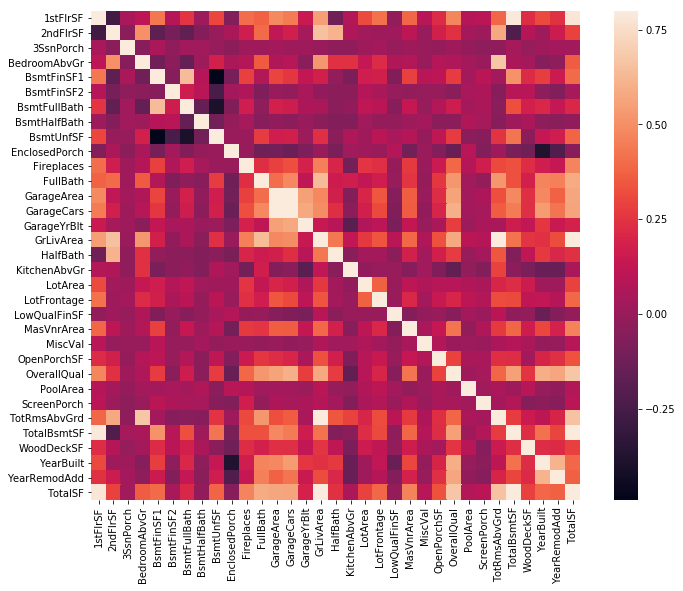

In [94]:
#correlation matrix
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [95]:
#These pop out - we are looking for variables that are telling us the same thing - multicollinearity

#TotalBsmntSF and 1stFlrSF are very highly correlated - basement sits below 1st floor
#GarageCars and GarageArea are veryhighly correlated - bigger the area more cars can fit in
#GarageYrBlt and YearBuilt are very highly correlated - usually build a garage same time as the house
#TotRmsAbvGrd and GrLivArea are very highly correlated - more area the more rooms

# Lets drop one of these from each pairing - how to decide which one look at correlation vs sale price and drop lower one
all_data.drop("TotRmsAbvGrd", axis = 1, inplace = True)
all_data.drop("GarageYrBlt", axis = 1, inplace = True)
all_data.drop("GarageArea", axis = 1, inplace = True)
all_data.drop("1stFlrSF", axis = 1, inplace = True)

### Label Encoding some categorical variables that may contain information in their ordering (ordinal values)

In [96]:
##learn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 75)


In [97]:
# #skewed Features?  Did not try this
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)


We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x1+x .

Note that setting  λ=0λ=0  is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [98]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     all_data[feat] = boxcox1p(all_data[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])

### Get dummy variables

In [99]:
orig_shape = all_data.shape
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 216)

# Split back out train and test set 

In [100]:
#get back original data
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]

In [101]:
print(df_train.shape)
print(df_test.shape)
print(y.shape)

(1458, 216)
(1459, 216)
(1458,)


# Create validation and training set

In [102]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = int(numb_rows*0.2)  # same as Kaggle's test set size
n_trn = int(len(df_train)-n_valid)

raw_train, raw_valid = split_vals(df_train, n_trn)
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1166, 216), (1166,), (292, 216))

### We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [103]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

 ## Random Forrest Regressor

In [104]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [105]:
# try one with validation set
m_rf = RandomForestRegressor(n_jobs=-1)
%time m_rf.fit(X_train, y_train)
print_score(m_rf)

# CPU times: user 272 ms, sys: 4 ms, total: 276 ms
# Wall time: 116 ms
# [11365.943311361803, 29441.96503508308, 0.9792271257647963, 0.8709453996412133]

CPU times: user 280 ms, sys: 4 ms, total: 284 ms
Wall time: 115 ms
[0.06327525396707406, 0.14842383489639469, 0.9751805363004752, 0.8559721747383182]


### Use OOB scoring (uses the unused rows in the random forrest as the validation set)

In [106]:
#lets train up a forrest, use oob score which uses unsampled rows of each tree as a validation set
m_rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m_rf.fit(df_train, y)
print_score(m_rf)

# CPU times: user 1.28 s, sys: 4 ms, total: 1.28 s
# Wall time: 258 ms
# [9591.783583210936, 11492.642527469268, 0.9852060426209739, 0.9803356451817082, 0.8854766985774472]

CPU times: user 1.44 s, sys: 4 ms, total: 1.44 s
Wall time: 369 ms
[0.052340884655430665, 0.05149056568761993, 0.9830173008329451, 0.9826661740116422, 0.8746216766892692]


generate submission

In [107]:
#make predictions
predicted_prices_rf = m_rf.predict(df_test)

#reverse the log +1
predicted_prices_rf = np.expm1(predicted_prices_rf)
predicted_prices_rf

array([125457.88467, 155322.23024, 174311.96582, ..., 159003.26266, 114147.55226, 226375.56764])

## XGBoost


In [47]:
import xgboost as xgb

small_n = 200
df_small = df_train[0:small_n]
y_small = y[0:small_n]


In [48]:
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
# gbm = xgb.XGBClassifier(max_depth=3,n_thread=4, n_estimators=3, learning_rate=0.005)
# gbm = xgb.XGBClassifier(nthread=4,silent=False)  #orig model with learning rate = .1
# gbm = xgb.XGBClassifier(nthread=4,silent=False,learning_rate=0.005)

In [49]:
# #with 100 samples
# %time  gbm.fit(df_small,y_small)
# # CPU times: user 33.3 s, sys: 228 ms, total: 33.5 s
# # Wall time: 8.39 s
# # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
# #        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
# #        n_jobs=1, nthread=4, objective='multi:softprob', random_state=0,
# #        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
# #        silent=False, subsample=1)


In [50]:
#with 200 samples
# %time  gbm.fit(df_small,y_small)

In [51]:
#with 300 samples
# %time  gbm.fit(df_small,y_small)
# CPU times: user 6min 22s, sys: 1.17 s, total: 6min 23s
# Wall time: 1min 35s

In [52]:
#with the entire train dataset
# %time  gbm.fit(df_train,y)
# CPU times: user 4h 5min 32s, sys: 15.8 s, total: 4h 5min 47s
# Wall time: 1h 1min 30s

In [53]:
# predictionsgbm = gbm.predict(df_test)

# Lets try lightGBM

In [59]:
import lightgbm

In [60]:
#
# Create the LightGBM data containers
#
# categorical_features = [c for c, col in enumerate(train.columns) if 'cat' in col]  # none its one hotted
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_valid, label=y_valid)

X_train.shape, y_train.shape, X_valid.shape

((1166, 216), (1166,), (292, 216))

In [66]:
#this model came from #2 above
model_lgbm1 = lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [71]:
score = rmsle_cv(model_lgbm1)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1167 (0.0044)



## Fit, then Predict, then reverse the log+1 

In [74]:
#fit the model
model_lgbm1.fit(df_train, y)

#make predictions
predicted_prices_lgbm = model_lgbm1.predict(df_test)

#reverse the log +1
predicted_prices_lgbm = np.expm1(predicted_prices_lgbm)
predicted_prices_lgbm

array([119331.40167, 154526.02558, 186359.15467, ..., 160171.25645, 119130.34739, 219745.31623])

## Prepare Submission Files
from https://www.kaggle.com/dansbecker/submitting-from-a-kernel<br>
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the housing data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [109]:
#a submission for m_rf
my_submission = pd.DataFrame({'Id': df_test_Id, 'SalePrice': predicted_prices_rf})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_rf.csv', index=False)

In [75]:
#a submission for lightgbm
my_submission = pd.DataFrame({'Id': df_test_Id, 'SalePrice': predicted_prices_lgbm})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_lgbm.csv', index=False)

In [53]:
#a submission for XGBoost
my_submission = pd.DataFrame({'Id': df_test_Id, 'SalePrice': predictionsgbm})
# you could use any filename. We choose submission here
my_submission.to_csv('submissionxgboost.csv', index=False)